In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_vae = pd.read_csv('ngram_results/ngram_results_vae.csv', index_col=0)
df_mdn = pd.read_csv('ngram_results/ngram_results_mdn_pre.csv', index_col=0)
df_true = pd.read_csv('ngram_results/ngram_results_true.csv', index_col=0)

## regular plot

In [2]:
df_vae = df_vae.dropna()
df_vae= df_vae.multiply(1/80)
df_vae = np.exp(df_vae)

#df_vae.head(5)

df_mdn = df_mdn.dropna()
df_mdn = df_mdn.multiply(1/80)
df_mdn = np.exp(df_mdn)


df_true = df_true.dropna()
df_true = df_true.multiply(1/80)
df_true = np.exp(df_true)

In [3]:
a_mv = pd.DataFrame.mean(df_vae['a'][0:100])
b_mv = pd.DataFrame.mean(df_vae['b'][0:100])
c0_mv = pd.DataFrame.mean(df_vae['c0'][0:100])
c1_mv = pd.DataFrame.mean(df_vae['c1'][0:100])
c2_mv = pd.DataFrame.mean(df_vae['c2'][0:100])
c3_mv = pd.DataFrame.mean(df_vae['c3'][0:100])
c4_mv = pd.DataFrame.mean(df_vae['c4'][0:100])

a_mm = pd.DataFrame.mean(df_mdn['a'][0:100])
b_mm = pd.DataFrame.mean(df_mdn['b'][0:100])
c0_mm = pd.DataFrame.mean(df_mdn['c0'][0:100])
c1_mm = pd.DataFrame.mean(df_mdn['c1'][0:100])
c2_mm = pd.DataFrame.mean(df_mdn['c2'][0:100])
c3_mm = pd.DataFrame.mean(df_mdn['c3'][0:100])
c4_mm = pd.DataFrame.mean(df_mdn['c4'][0:100])

a_mt = pd.DataFrame.mean(df_true['a'][0:100])
b_mt = pd.DataFrame.mean(df_true['b'][0:100])
c0_mt = pd.DataFrame.mean(df_true['c0'][0:100])
c1_mt = pd.DataFrame.mean(df_true['c1'][0:100])
c2_mt= pd.DataFrame.mean(df_true['c2'][0:100])
c3_mt = pd.DataFrame.mean(df_true['c3'][0:100])
c4_mt = pd.DataFrame.mean(df_true['c4'][0:100])

In [4]:
y2 = [a_mm, c0_mm, c1_mm, c2_mm, c3_mm, c4_mm, b_mm]
y1 = [a_mv, c0_mv, c1_mv, c2_mv, c3_mv, c4_mv, b_mv]
y = [a_mt, c0_mt, c1_mt, c2_mt, c3_mt, c4_mt, b_mt]
x = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

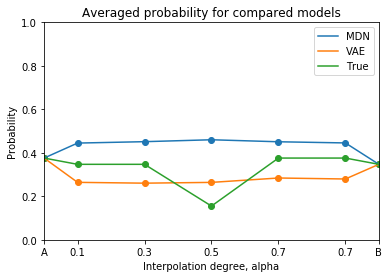

In [5]:
plt.ylim(0,1)
plt.xlim(0,1)
plt.scatter(x,y2)
plt.scatter(x,y1)
plt.scatter(x,y)
plt.title("Averaged probability for compared models")

plt.plot(x,y2, label='MDN')
plt.plot(x,y1, label='VAE')
plt.plot(x,y, label='True')
plt.legend()

plt.xlabel("Interpolation degree, alpha")
plt.xticks([0,0.1, 0.3, 0.5, 0.7,0.9, 1], ['A',0.1, 0.3, 0.5, 0.7, 0.7,'B'])
plt.ylabel("Probability")
plt.savefig("imgs/model_comparison_plot.png")
plt.show()

## boxplot

In [6]:
a_mv = df_vae['a'][0:100].values
b_mv = df_vae['b'][0:100].values
c0_mv = df_vae['c0'][0:100].values
c1_mv = df_vae['c1'][0:100].values
c2_mv = df_vae['c2'][0:100].values
c3_mv = df_vae['c3'][0:100].values
c4_mv = df_vae['c4'][0:100].values

a_mm = df_mdn['a'][0:100].values
b_mm = df_mdn['b'][0:100].values
c0_mm = df_mdn['c0'][0:100].values
c1_mm = df_mdn['c1'][0:100].values
c2_mm = df_mdn['c2'][0:100].values
c3_mm = df_mdn['c3'][0:100].values
c4_mm = df_mdn['c4'][0:100].values

a_mt = df_true['a'][0:100].values
b_mt = df_true['b'][0:100].values
c0_mt = df_true['c0'][0:100].values
c1_mt = df_true['c1'][0:100].values
c2_mt= df_true['c2'][0:100].values
c3_mt = df_true['c3'][0:100].values
c4_mt = df_true['c4'][0:100].values

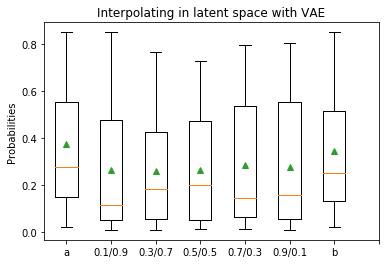

In [7]:
plt.boxplot([a_mv, c0_mv, c1_mv, c2_mv, c3_mv, c4_mv, b_mv],0, 'b+', showfliers=True, showmeans=True)
plt.title("Interpolating in latent space with VAE")
plt.ylabel("Probabilities")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['a', '0.1/0.9', '0.3/0.7', '0.5/0.5', '0.7/0.3', '0.9/0.1', 'b'])
plt.savefig("boxplot_VAE.png")
plt.show()

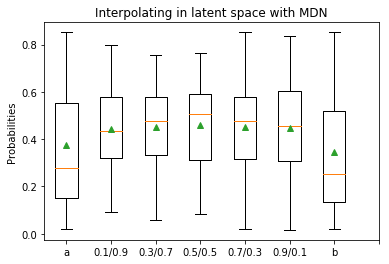

In [8]:
plt.boxplot([a_mm, c0_mm, c1_mm, c2_mm, c3_mm, c4_mm, b_mm],0, 'b+', showfliers=True, showmeans=True)
plt.title("Interpolating in latent space with MDN")
plt.ylabel("Probabilities")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['a', '0.1/0.9', '0.3/0.7', '0.5/0.5', '0.7/0.3', '0.9/0.1', 'b'])
plt.savefig("boxplot_MDN.png")
plt.show()

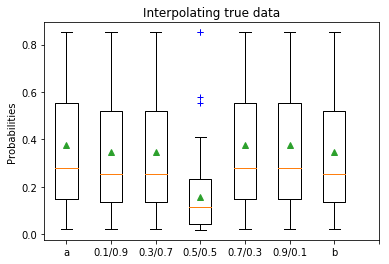

In [9]:
plt.boxplot([a_mt, c0_mt, c1_mt, c2_mt, c3_mt, c4_mt, b_mt],0, 'b+', showfliers=True, showmeans=True)
plt.title("Interpolating true data")
plt.ylabel("Probabilities")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['a', '0.1/0.9', '0.3/0.7', '0.5/0.5', '0.7/0.3', '0.9/0.1', 'b'])
plt.savefig("boxplot_true.png")
plt.show()

In [10]:
a = [129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,
     129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,
     129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,
    129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129]

from ngram_compute import compute_ngram_prob

In [11]:
b = compute_ngram_prob(a)

In [12]:
b

-12.870831233413126

In [13]:
from math import log

In [14]:
p = 0
for i in range(75):
    p += log(0.85)

In [15]:
p

-12.188919712333131

In [16]:
alpha = 0.1 
for i in range(5):
    print(alpha)
    alpha += 0.2

0.1
0.30000000000000004
0.5
0.7
0.8999999999999999


In [17]:
p2 = np.load("npys/postprocess_avg2.npy")
p3 = np.load("npys/postprocess_avg3.npy")
p1 = np.load("npys/unprocessed.npy")

p1.shape, p2.shape, p3.shape

((9977,), (9809,), (9921,))

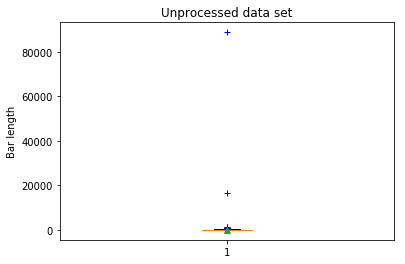

In [18]:
plt.boxplot(p1,0, 'b+', showfliers=True, showmeans=True)
plt.title("Unprocessed data set")
plt.ylabel("Bar length")
#plt.xticks([1, 2], ['<= 3*avg_len','<= 2*avg_len'])
plt.savefig("imgs/box_data_pre.png")
plt.show()

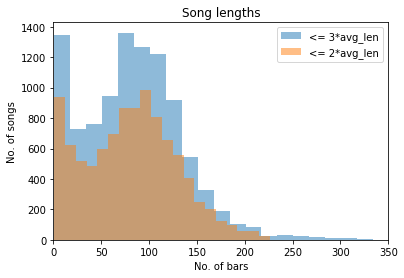

In [19]:
p2 = np.load("npys/postprocess_avg2.npy")
p3 = np.load("npys/postprocess_avg3.npy")
plt.hist(p3, bins=20, alpha=0.5, label="<= 3*avg_len")
plt.hist(p2, bins=20, alpha=0.5, label="<= 2*avg_len")
plt.title("Song lengths")
plt.xlabel("No. of bars")
plt.ylabel("No. of songs")
plt.xlim(0,350)
plt.legend(loc='upper right')
plt.savefig("imgs/histogram_songlengths.png")


plt.show()

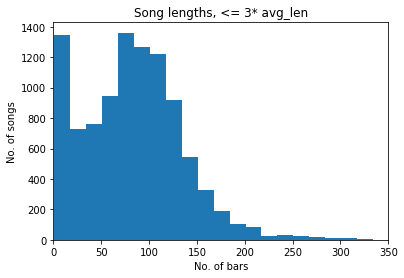

In [20]:
plt.hist(p3, bins=20)
plt.title("Song lengths, <= 3* avg_len")
plt.xlabel("No. of bars")
plt.ylabel("No. of songs")
plt.xlim(0,350)
plt.savefig("imgs/histogram_songlengths3.png")
plt.show()

In [21]:
import os
import numpy as np

avg_song_len = 113

In [22]:
post_process2 = []

In [23]:
pre_process = []

In [24]:
post_process3 = []

In [25]:
for path, dirs, files in os.walk("songs_encoder_inputs"):
    for file in files:
        song_len = len(np.load(path + os.sep + file))

        if song_len <= 2 * avg_song_len:
            post_process2.append(song_len)
            pre_process.append(len(np.load(path + os.sep + file)))
        else: 
            #post_process2.append(song_len)
            pre_process.append(len(np.load(path + os.sep + file)))

KeyboardInterrupt: 

In [ ]:
plt.hist([post_process3, post_process2], bins=100, alpha=0.5,histtype='bar', 
         label=["<= 3*avg_len", "<= 2*avg_len"])
#plt.hist(sorted(post_process2), bins=334, alpha=0.5, label="<= 2*avg_len")
plt.title("Song lengths")
plt.xlabel("No. of bars")
plt.ylabel("No. of songs")
plt.xlim(0,350)
plt.legend(loc='upper right')
#plt.savefig("imgs/histogram_songlengths.png")


plt.show()

In [ ]:
len(post_process3), len(post_process2)

In [ ]:
from collections import Counter

d = Counter(post_process3)
j = Counter(post_process2)

d, j

In [ ]:
max(post_process2)

In [ ]:
max(post_process3)